# Usage of the external segmentation package 'cellpose'

In [1]:
# This notebook shows how we can easily use an external segmentation packages in the squidpy framework.

In [2]:
import squidpy as sq
import numpy as np
import matplotlib.pyplot as plt

## Prepare cellpose functionality for squidpy

In [3]:
from cellpose import models

In [4]:
# The method parameter of the :func:`sq.im.segment` method accepts any callable with the signature:
# :class:`numpy.ndarray` ``(height, width, channels)`` **->** :class:`numpy.ndarray` ``(height, width[, channels])``.
# Additional model specific arguments will also be passed on.
# To use the cellpose model, we define a wrapper that initializes the model, evaluates it and returns the
# segmentation mask. We can make use of cellpose specific options by passing on arguments like the minimum
# number of pixels per mask ``min_size``.

def cellpose(img, min_size=15):
    model = models.Cellpose(model_type='nuclei')
    res, _, _, _ = model.eval(
        img, 
        channels=[0, 0], 
        diameter=None, 
        min_size=min_size,
    )
    return res

## Cell segmentation on visium fluorescence data

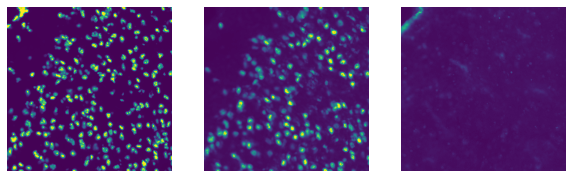

In [5]:
# Load the image and visualize its channels. We will use the first channel for segmentation.

img = sq.datasets.visium_fluo_image_crop()
crop = img.crop_corner(1000, 1000, size=1000)

fig, axes = plt.subplots(1, 3, figsize=(10, 20))
for i, ax in enumerate(axes):
    crop.show("image", channel=i, ax=ax)

In [6]:
# Segment the image using the cellpose function defined above. Cellpose can incorporate multiple channels,
# but we will only use the DAPI channel.

sq.im.segment(img=crop, layer="image", channel=0, method=cellpose)

ImageContainer[shape=(1000, 1000), layers=['image', 'segmented_custom']]
Number of segments in crop: 331


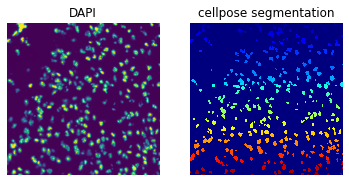

In [7]:
# Plot the DAPI channel of the image crop and the segmentation result.

print(crop)
print(f"Number of segments in crop: {len(np.unique(crop['segmented_custom']))}")

fig, axes = plt.subplots(1, 2)
crop.show("image", channel=0, ax=axes[0])
_ = axes[0].set_title("DAPI")
crop.show("segmented_custom", cmap="jet", interpolation="none", ax=axes[1])
_ = axes[1].set_title("cellpose segmentation")

ImageContainer[shape=(1000, 1000), layers=['image', 'segmented_custom']]
Number of segments in crop: 187


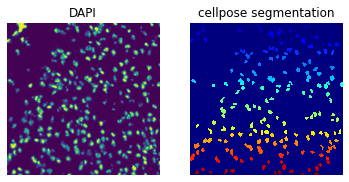

In [8]:
# The :func:`sq.im.segment` method will pass any additional arguments to the cellpose function, 
# so we can also filter out segments with less than 200 pixels and compare the results to the
# segmentation result from above.

sq.im.segment(img=crop, layer="image", channel=0, method=cellpose, min_size=200)

print(crop)
print(f"Number of segments in crop: {len(np.unique(crop['segmented_custom']))}")

fig, axes = plt.subplots(1, 2)
crop.show("image", channel=0, ax=axes[0])
_ = axes[0].set_title("DAPI")
crop.show("segmented_custom", cmap="jet", interpolation="none", ax=axes[1])
_ = axes[1].set_title("cellpose segmentation")